# House - price prediction 

In [1]:
import pandas as pd
import numpy as np


In [2]:
housing=pd.read_csv('housing.csv')
housing.head()


CRIN    ZN  INDUS  CHAS    NDX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469    NaN  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [3]:
housing.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIN     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NDX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [5]:
housing.describe()
# housing["RM"].median()

CRIN          ZN       INDUS        CHAS         NDX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.286361   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.704319   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

array([[<Axes: title={'center': 'CRIN'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NDX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

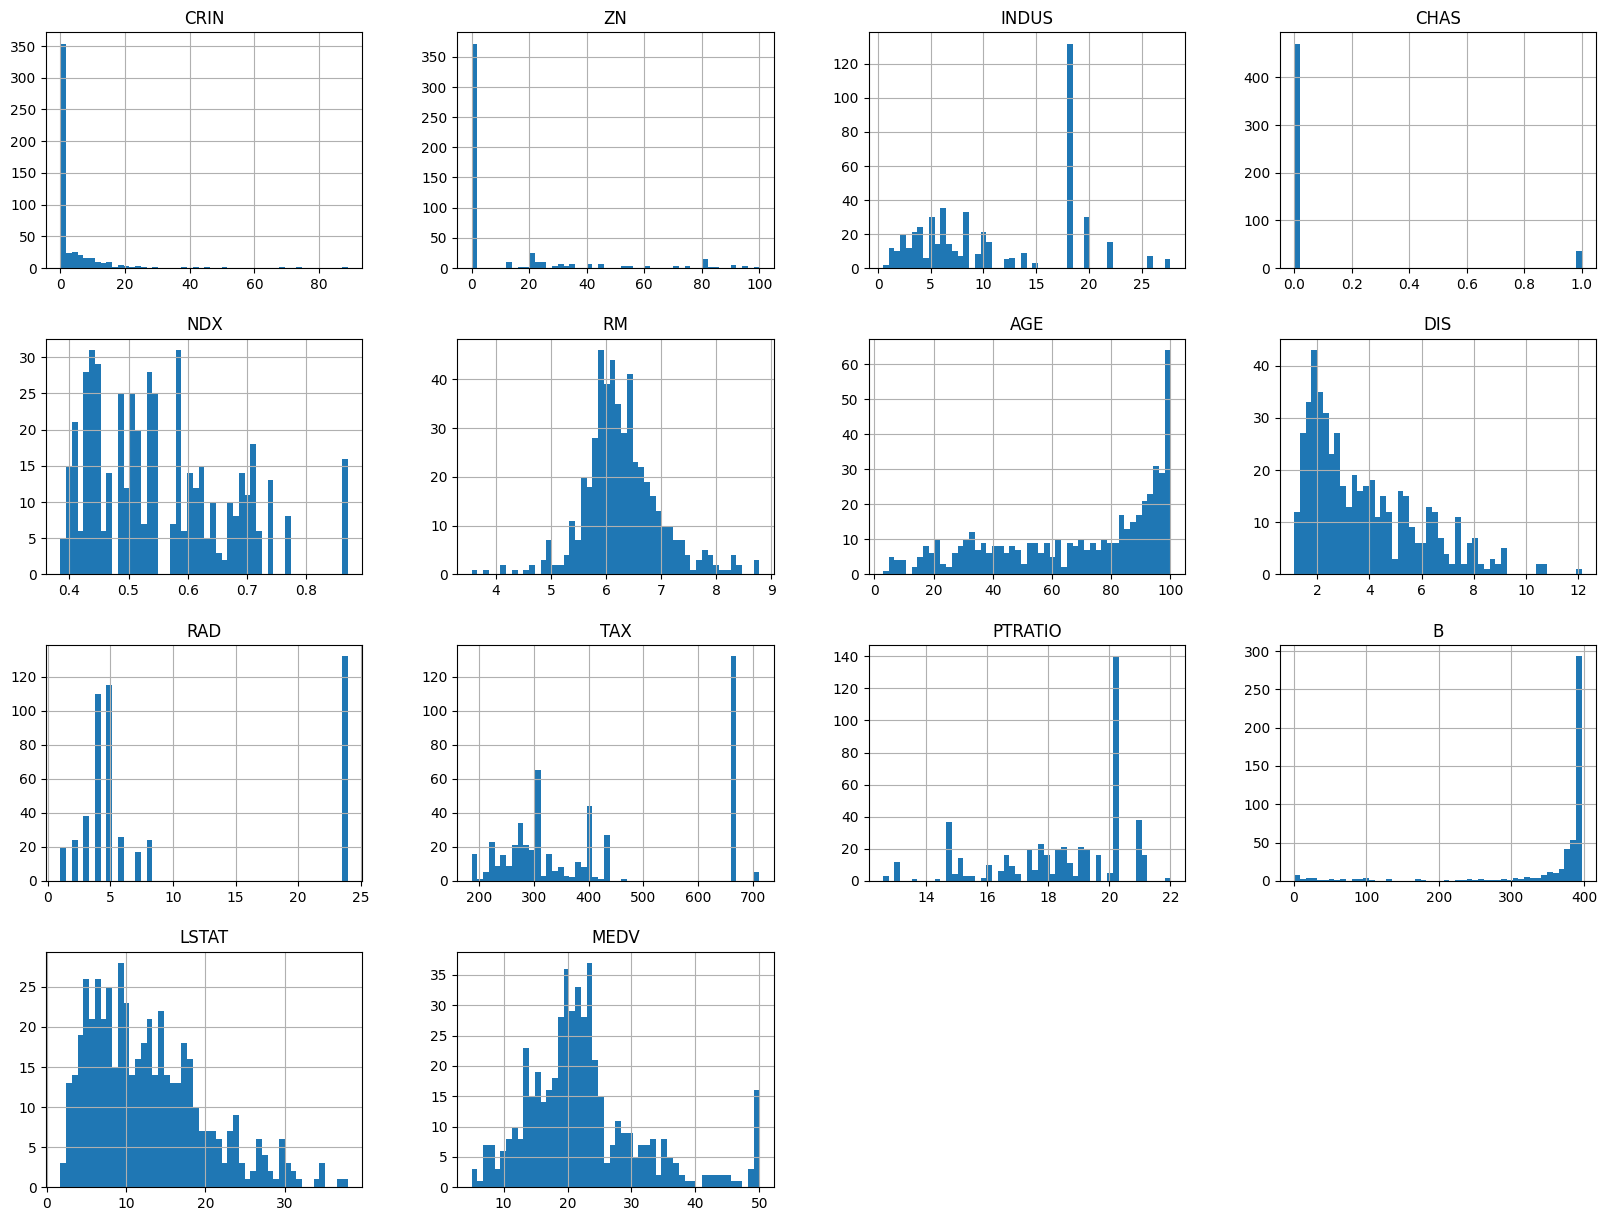

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

In [7]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"{len(train_set)}\n{len(test_set) } ")

404
102 


In [8]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing , housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    
    

In [10]:
print(strat_train_set.shape)
print(strat_test_set.shape)

(404, 14)
(102, 14)


## correlation

In [11]:
corr_matrix=housing.corr()

In [12]:
corr_matrix

CRIN        ZN     INDUS      CHAS       NDX        RM       AGE  \
CRIN     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.220864  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.312311 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.394274  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.090846  0.086518   
NDX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302813  0.731470   
RM      -0.220864  0.312311 -0.394274  0.090846 -0.302813  1.000000 -0.241698   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.241698  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.207395 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.211244  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.293241  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.359057  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.129560 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.612957  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.696166 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIN    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NDX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.207395 -0.211244 -0.293241 -0.359057  0.129560 -0.612957  0.696166  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [13]:
corr_matrix['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NDX       -0.427321
CRIN      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.696166
MEDV       1.000000
Name: MEDV, dtype: float64

In [14]:
housing=strat_train_set.copy()

array([[<Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='MEDV', ylabel='LSTAT'>],
       [<Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>],
       [<Axes: xlabel='LSTAT', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='MEDV', ylabel='ZN'>],
       [<Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>]], dtype=object)

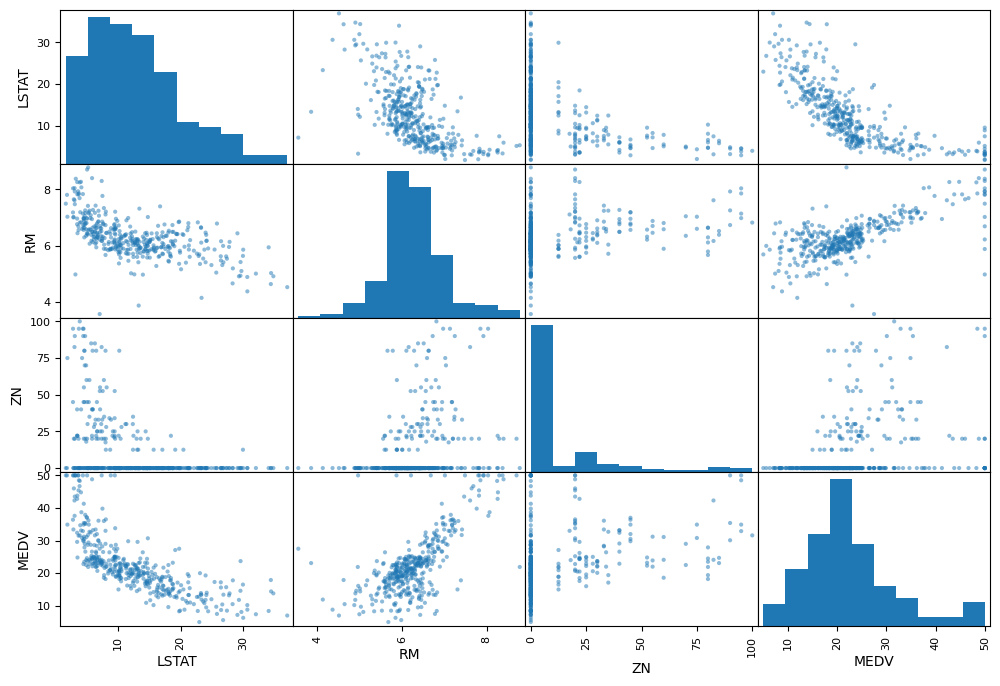

In [15]:
from pandas.plotting import scatter_matrix
attributes=['LSTAT','RM','ZN','MEDV']
scatter_matrix(housing[attributes],figsize=(12,8))

In [16]:
housing=strat_train_set.drop('MEDV',axis=1)
housing_labels=strat_train_set["MEDV"].copy()

In [17]:
strat_train_set['CHAS'].value_counts()
# strat_train_set

CHAS
0    376
1     28
Name: count, dtype: int64

In [18]:
housing['RM'].shape

(404,)

In [19]:
housing.head()

CRIN    ZN  INDUS  CHAS    NDX     RM   AGE     DIS  RAD  TAX  \
254  0.04819  80.0   3.64     0  0.392  6.108  32.0  9.2203    1  315   
348  0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
476  4.87141   0.0  18.10     0  0.614  6.484  93.6  2.3053   24  666   
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
326  0.30347   0.0   7.38     0  0.493  6.312  28.9  5.4159    5  287   

     PTRATIO       B  LSTAT  
254     16.4  392.89   6.57  
348     17.0  390.94   5.99  
476     20.2  396.21  18.68  
321     19.6  396.90   6.87  
326     19.6  396.90   6.15

## Removing NULL Values

In [20]:
# from sklearn.impute import SimpleImputer
# Imputer=SimpleImputer(strategy='median')
# Imputer.fit(housing)

In [21]:
# Imputer.statistics_

In [22]:
# X=Imputer.transform(housing)

In [23]:
# housing_tr=pd.DataFrame(X,columns=housing.columns)

In [24]:
# housing_tr.shape

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('Imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [26]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [27]:
housing_num_tr.shape

(404, 13)

In [28]:
housing_num_tr


array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(housing_num_tr,housing_labels)

LinearRegression()

In [30]:
housing['RM']

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=my_pipeline.transform((some_data))

In [32]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24362325, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [33]:
model.predict(prepared_data)

array([23.9236012 , 27.2213039 , 20.5754941 , 25.0557262 , 23.77265299])

In [34]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [35]:
from sklearn.metrics import mean_squared_error
housing_prediction=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_prediction)
rms=np.sqrt(mse)

In [36]:
mse

23.219243759573352

## Save 

In [37]:
from joblib import dump,load
dump(model,'house price prediction.joblib')

['house price prediction.joblib']

## Testing

In [38]:
X_test=strat_test_set.drop('MEDV',axis=1)
Y_test=strat_test_set['MEDV'].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions)

[22.64347658 17.22791539 30.0178398  30.72342288  8.75586186 13.3515415
 17.24022431 17.74725209 32.45502063 36.12168315 16.3318562   0.42953867
 23.01354806 20.4374199  20.04037632 12.89259137 31.15429928 13.42752037
 25.04327757 24.10162147 20.49044838 17.02936212 17.97691413 25.54856325
 19.54028365 32.89119146 19.45047297 33.75319412  7.96870035 34.64637874
 19.50079451 21.41692171 29.28373773 16.36928897 26.98102992 18.35084947
 37.32179713 24.54933684 22.24154464 37.18140767 25.16696469 34.47982823
 23.4566341  23.97300511 18.50287333 32.69151542 38.55669141 21.39673754
 17.62151337 16.26587806 21.225452   12.37639268 19.83222118 20.40383826
 27.94239843 33.12287504 40.22933393 31.34961718 14.91759647 20.75835169
 40.51528291 18.12256217 15.08873144 27.6374677  19.48747131 32.53673711
 23.3840862  20.28811488 21.16927946 33.85643451 34.09780814 27.62164871
 24.47031066 21.8194729  36.15215445  8.555509   17.41209448 21.42321501
 20.55049129 22.99912205 25.96702309 22.59575533 14.

In [39]:
final_rmse

4.141423459232144